In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info() #to see non null values

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [10]:
df.describe() #to see insights, such as number of rows

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
X = df.drop("charges", axis=1) #drop charges to seperate features
y = df["charges"] #treat charges as the target

Handle categorical variables (CRITICAL). Linear Regression cannot understand text.

We convert categorical columns using one-hot encoding: sex → sex_male, smoker → smoker_yes, region → multiple columns

In [29]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.7, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
y_predict = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2s = r2_score(y_test, y_predict)

In [50]:
print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2s)

MAE: 4145.450555627587
MSE: 33780509.57479164
R²: 0.7696118054369011


now, I want to see what factor contributing to the insurance premium a lot, so get the value of m (y=xm+b)

In [61]:
coeff_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_
}).sort_values(by ="Coefficient",ascending=False)

coeff_df


,Feature,Coefficient
4,smoker_yes,23628.367222
2,children,424.119128
1,bmi,348.906915
0,age,261.296924
3,sex_male,104.811823
5,region_northwest,-486.934610
7,region_southwest,-926.322908
6,region_southeast,-970.968839


Let's Visualize now

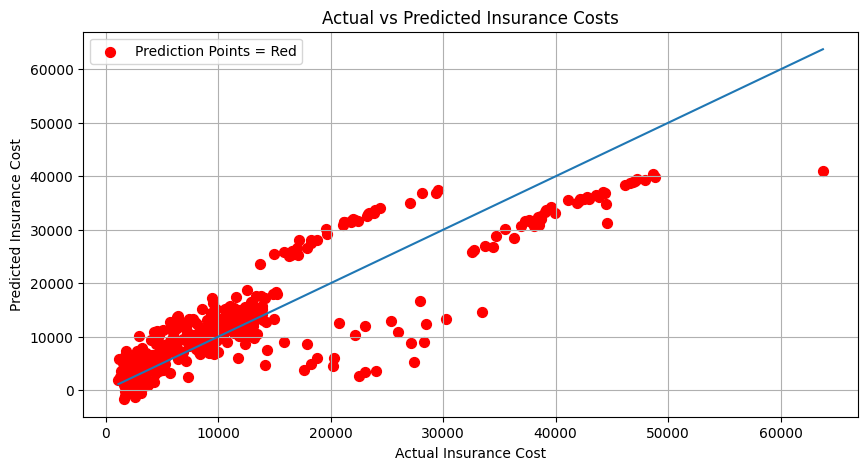

In [105]:
plt.figure(figsize=(10,5))

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.scatter(y_test,y_predict, label="Prediction Points = Red", color="red", s=50)
plt.xlabel("Actual Insurance Cost")
plt.ylabel("Predicted Insurance Cost")
plt.title("Actual vs Predicted Insurance Costs")
plt.grid(True)
plt.legend()
plt.show()